# Plot History

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'axes.facecolor': (1.0, 1.0, 1.0, 0.0), 'figure.facecolor':  (1.0, 0.0, 0.0, 0.0)})
outdir = './outdir'

In [2]:
all_list = [np.load(outdir+'/Mstr_err_sn'+str(sn)+'.npy')[:,[0, 2, 4, 6]] for sn in [99, 67, 50, 33]]
all_str = np.stack(all_list, axis=1)
all_clust_list = [np.load(outdir+'/Clust_err_sn'+str(sn)+'.npy')[:,[0, 1, 2]] for sn in [99, 67, 50, 33]]
all_clust = np.stack(all_clust_list, axis=1)

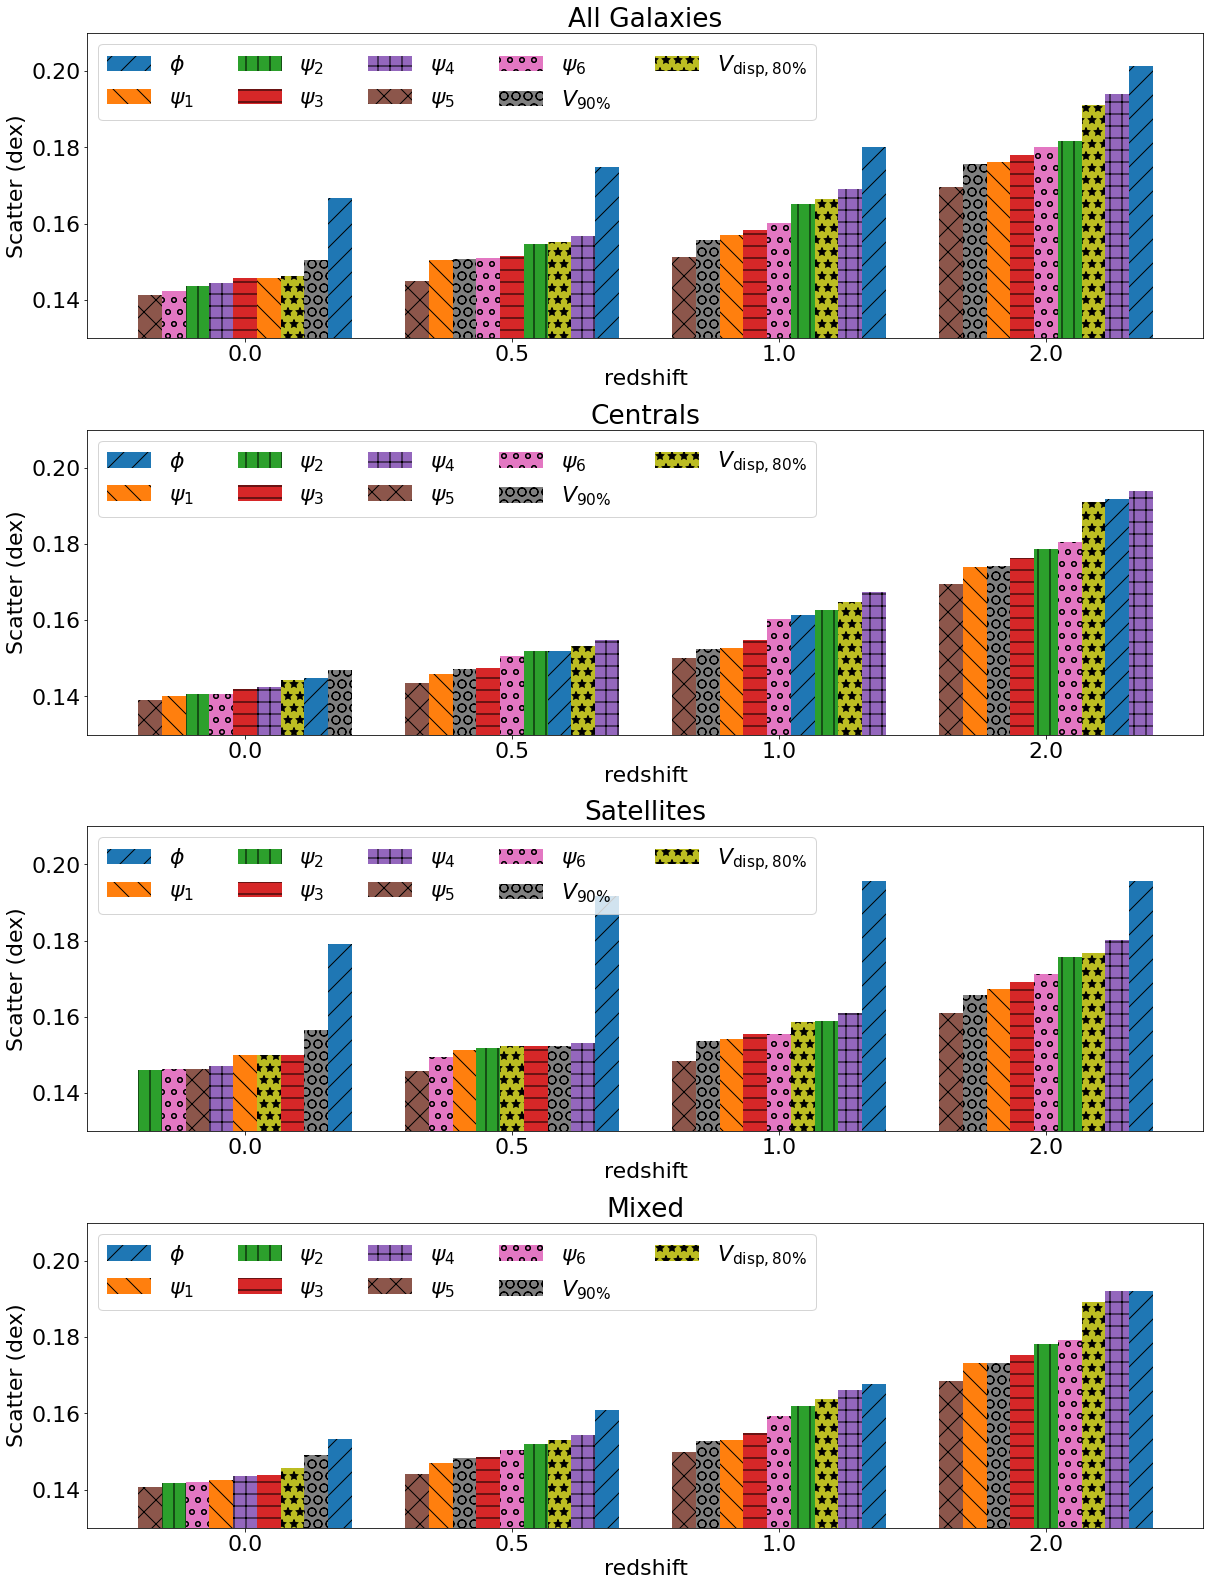

In [8]:
names = np.array(['$M_{\rm DM,peak}$', '$M_{\rm DM,90\%}$','$M_{\rm R_{max},peak}$', 
         '$M_{\rm R_{max},80\%}$','$|\dot{M_{\rm DM}}|_{\rm peak}$', 
         '$|\dot{M_{\rm DM}}|_{\rm 60\%}$','$V_{\rm peak}$', '$V_{\rm 90\%}$', 
         '$V_{\rm disp,peak}$', '$V_{\rm disp,80\%}$', '$\phi$', '$\psi_1$', 
         '$\psi_2$', '$\psi_3$', '$\psi_4$', '$\psi_5$', '$\psi_6$'])
plot_nms = np.array([plot_nm.replace('\rm', '\\rm') for plot_nm in names])

plot_pos = [10, 11, 12, 13, 14, 15, 16, 7, 9]
zarr = np.array([[[0.0], [0.5], [1.0], [1.5]]])
bar_pos = np.repeat(np.repeat(zarr, len(plot_pos), axis=0), 4, axis=2)
all_str_tmp = all_str[plot_pos]

all_z_pos = np.argsort(all_str_tmp, axis=0)
all_z_rev = np.argsort(all_z_pos, axis=0)
bar_offs = np.linspace(-0.2, 0.2, len(plot_pos)+1)
bar_offset = (bar_offs[1:] + bar_offs[:-1])/2
bar_width = (bar_offs[1]-bar_offs[0])
bar_offsets = bar_offset[all_z_rev]
cmap = matplotlib.cm.get_cmap('tab10')
#cols = np.repeat(np.repeat(np.expand_dims(np.expand_dims(cmap(np.linspace(0.05, 0.95, len(plot_pos))), axis=1), axis=2), 4, axis=1), 4, axis=2)
cols = cmap(np.linspace(0.05, 0.95, 10))
hatch = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '*']
#hatchs = np.repeat(np.repeat(np.expand_dims(np.expand_dims(hatch[:len(plot_pos)], axis=1), axis=2), 4, axis=1), 4, axis=2)
hatchs = hatch[:len(plot_pos)]
tits = ['All Galaxies', 'Centrals', 'Satellites', 'Mixed']

fig = plt.figure(figsize=(20, 27.5))
fig.patch.set_alpha(0.0)
plt.subplots_adjust(hspace=0.3)
for i in range(4):
    ax = plt.subplot(4, 1, i+1)
    #ax.bar((bar_pos[:,:,i]+bar_offsets[:,:,i]).flatten(), all_str_tmp[:,:,i].flatten(), width=bar_width, color=cols[:,:,i,:].reshape(-1, 4), hatch=hatchs[:,:,i].reshape(-1))
    for j, po in enumerate(plot_pos):
        ax.bar((bar_pos[j,:,i]+bar_offsets[j,:,i]).flatten(), all_str_tmp[j,:,i].flatten(), width=bar_width, color=cols[j], hatch=hatchs[j])
    ax.legend(plot_nms[plot_pos], ncol=5)
    ax.set_ylabel('Scatter (dex)')
    ax.set_xlabel('redshift')
    ax.set_xticks(np.squeeze(zarr))
    ax.set_xticklabels(labels=['0.0', '0.5', '1.0', '2.0'])
    ax.set_title(tits[i])
    ax.set_ylim(0.13, 0.21)
    ax.patch.set_alpha(0.0)


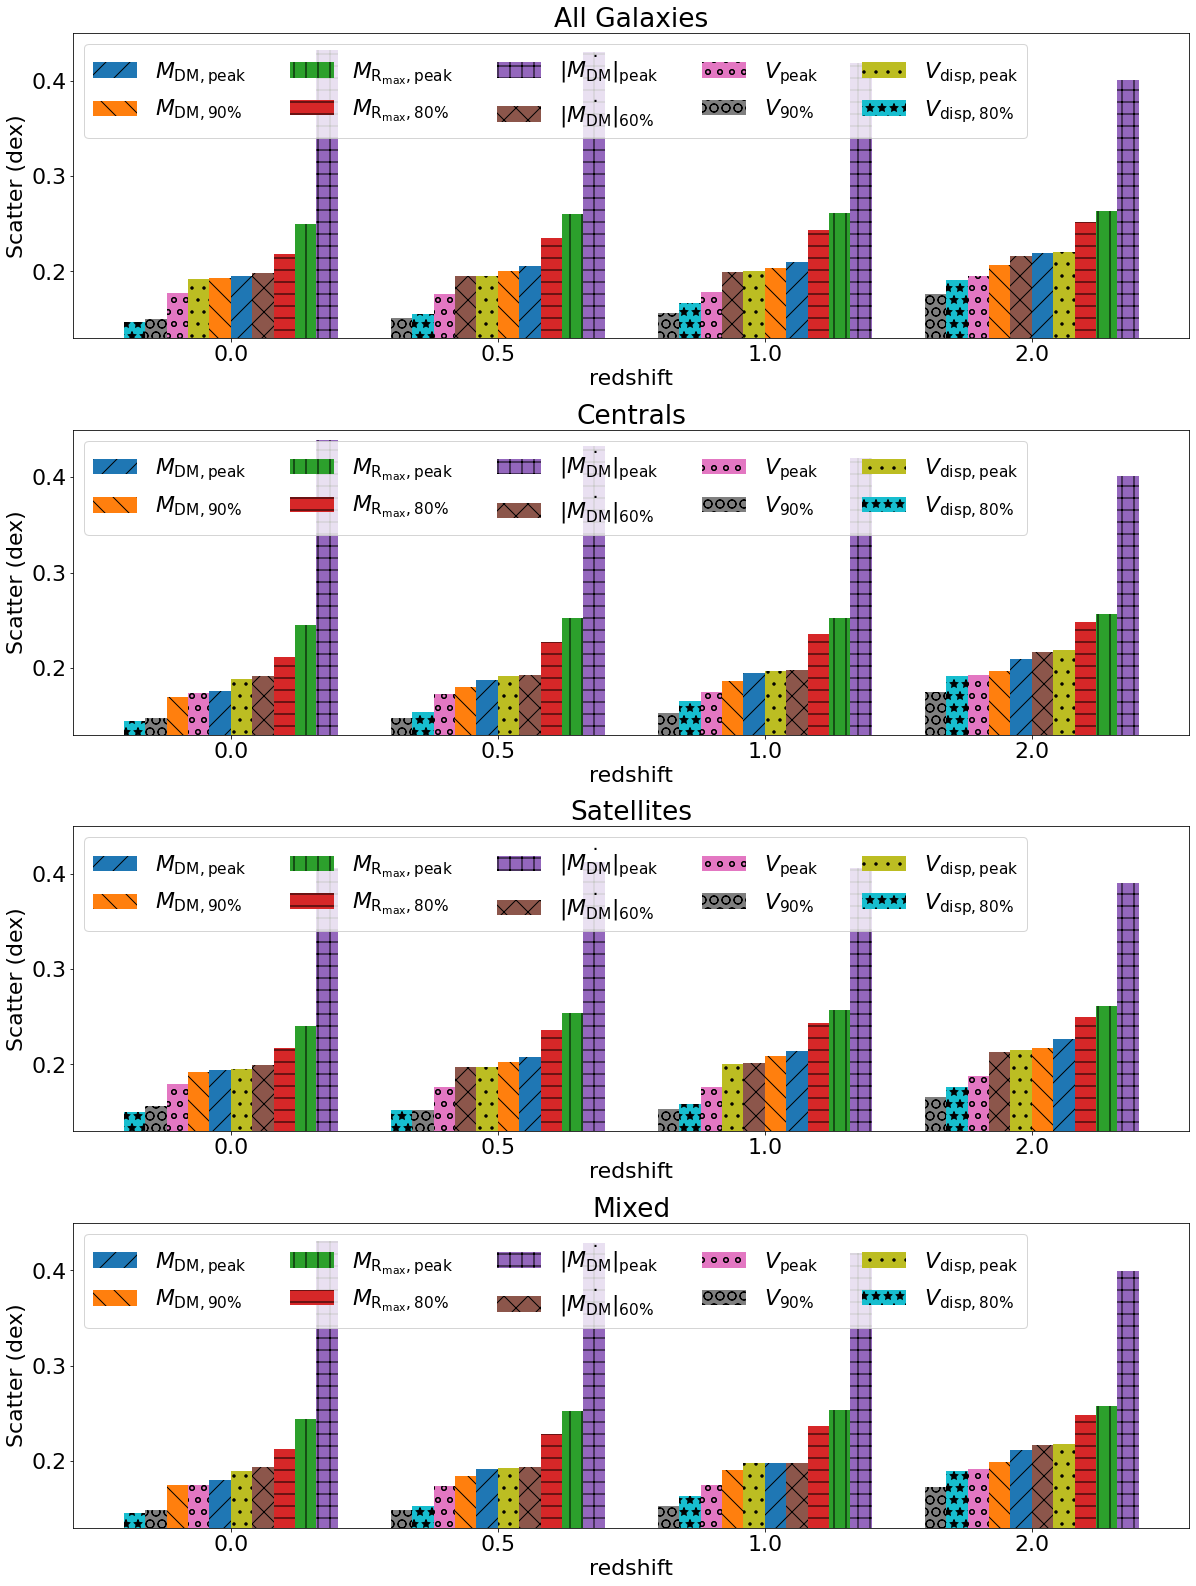

In [9]:
plot_pos = np.arange(10)
zarr = np.array([[[0.0], [0.5], [1.0], [1.5]]])
bar_pos = np.repeat(np.repeat(zarr, len(plot_pos), axis=0), 4, axis=2)
all_str_tmp = all_str[plot_pos]

all_z_pos = np.argsort(all_str_tmp, axis=0)
all_z_rev = np.argsort(all_z_pos, axis=0)
bar_offs = np.linspace(-0.2, 0.2, len(plot_pos)+1)
bar_offset = (bar_offs[1:] + bar_offs[:-1])/2
bar_width = (bar_offs[1]-bar_offs[0])
bar_offsets = bar_offset[all_z_rev]
cmap = matplotlib.cm.get_cmap('tab10')
#cols = np.repeat(np.repeat(np.expand_dims(np.expand_dims(cmap(np.linspace(0.05, 0.95, len(plot_pos))), axis=1), axis=2), 4, axis=1), 4, axis=2)
cols = cmap(np.linspace(0.05, 0.95, len(plot_pos)))
hatch = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
#hatchs = np.repeat(np.repeat(np.expand_dims(np.expand_dims(hatch[:len(plot_pos)], axis=1), axis=2), 4, axis=1), 4, axis=2)
hatchs = hatch[:len(plot_pos)]
tits = ['All Galaxies', 'Centrals', 'Satellites', 'Mixed']

fig = plt.figure(figsize=(20, 27.5))
fig.patch.set_alpha(0.0)
plt.subplots_adjust(hspace=0.3)
for i in range(4):
    ax = plt.subplot(4, 1, i+1)
    #ax.bar((bar_pos[:,:,i]+bar_offsets[:,:,i]).flatten(), all_str_tmp[:,:,i].flatten(), width=bar_width, color=cols[:,:,i,:].reshape(-1, 4), hatch=hatchs[:,:,i].reshape(-1))
    for j, po in enumerate(plot_pos):
        ax.bar((bar_pos[j,:,i]+bar_offsets[j,:,i]).flatten(), all_str_tmp[j,:,i].flatten(), width=bar_width, color=cols[j], hatch=hatchs[j])
    ax.legend(plot_nms[plot_pos], ncol=5)
    ax.set_ylabel('Scatter (dex)')
    ax.set_xlabel('redshift')
    ax.set_xticks(np.squeeze(zarr))
    ax.set_xticklabels(labels=['0.0', '0.5', '1.0', '2.0'])
    ax.set_title(tits[i])
    ax.set_ylim(0.13, 0.45)
    ax.patch.set_alpha(0.0)
    

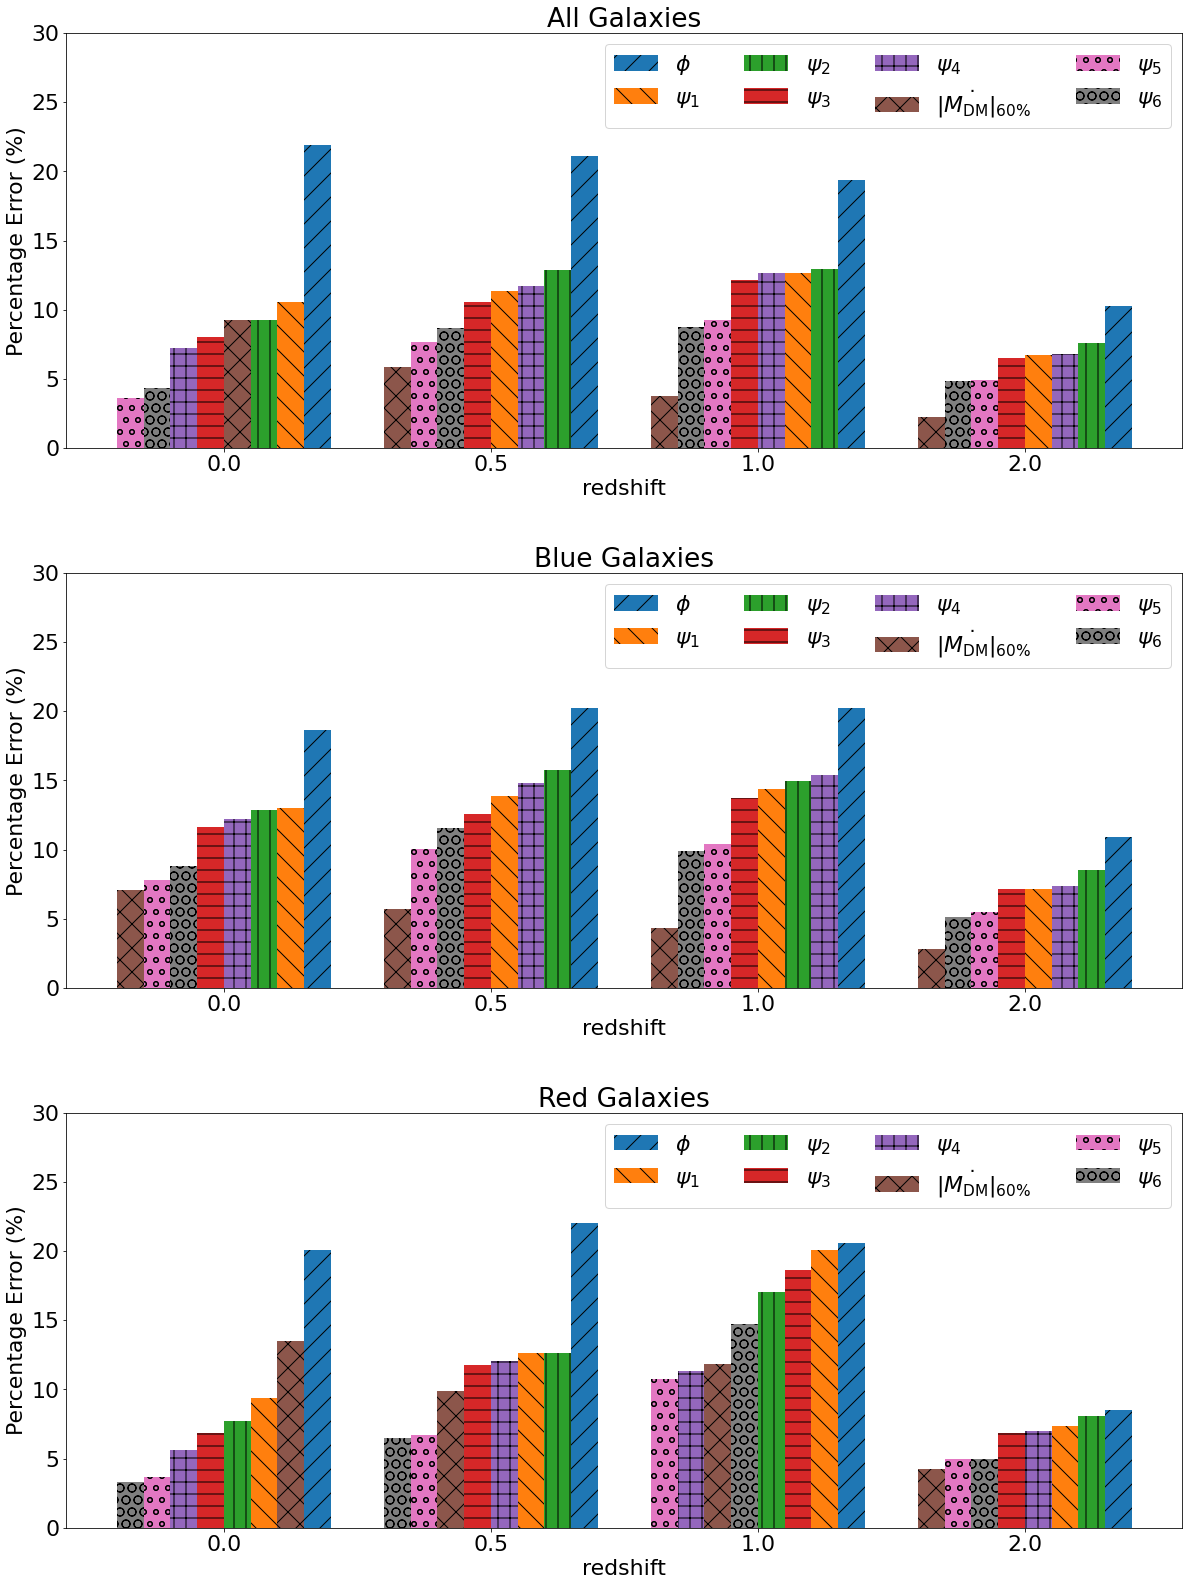

In [10]:
names = np.array(['$M_{\rm DM,peak}$', '$M_{\rm DM,90\%}$','$M_{\rm R_{max},peak}$', 
         '$M_{\rm R_{max},80\%}$','$|\dot{M_{\rm DM}}|_{\rm peak}$', 
         '$|\dot{M_{\rm DM}}|_{\rm 60\%}$','$V_{\rm peak}$', '$V_{\rm 90\%}$', 
         '$V_{\rm disp,peak}$', '$V_{\rm disp,80\%}$', '$\phi$', '$\psi_1$', 
         '$\psi_2$', '$\psi_3$', '$\psi_4$', '$\psi_5$', '$\psi_6$'])
plot_nms = np.array([plot_nm.replace('\rm', '\\rm') for plot_nm in names])

plot_pos = [10, 11, 12, 13, 14, 5, 15, 16]
zarr = np.array([[[0.0], [0.5], [1.0], [1.5]]])
bar_pos = np.repeat(np.repeat(zarr, len(plot_pos), axis=0), 3, axis=2)
all_clust_tmp = all_clust[plot_pos]

all_z_pos = np.argsort(all_clust_tmp, axis=0)
all_z_rev = np.argsort(all_z_pos, axis=0)
bar_offs = np.linspace(-0.2, 0.2, len(plot_pos)+1)
bar_offset = (bar_offs[1:] + bar_offs[:-1])/2
bar_width = (bar_offs[1]-bar_offs[0])
bar_offsets = bar_offset[all_z_rev]
cmap = matplotlib.cm.get_cmap('tab10')
#cols = np.repeat(np.repeat(np.expand_dims(np.expand_dims(cmap(np.linspace(0.05, 0.95, len(plot_pos))), axis=1), axis=2), 4, axis=1), 4, axis=2)
cols = cmap(np.linspace(0.05, 0.95, 10))
hatch = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
#hatchs = np.repeat(np.repeat(np.expand_dims(np.expand_dims(hatch[:len(plot_pos)], axis=1), axis=2), 4, axis=1), 4, axis=2)
hatchs = hatch[:len(plot_pos)]
tits = ['All Galaxies', 'Blue Galaxies', 'Red Galaxies']

fig = plt.figure(figsize=(20, 27.5))
fig.patch.set_alpha(0.0)
plt.subplots_adjust(hspace=0.3)
for i in range(3):
    ax = plt.subplot(3, 1, i+1)
    #ax.bar((bar_pos[:,:,i]+bar_offsets[:,:,i]).flatten(), all_clust_tmp[:,:,i].flatten(), width=bar_width, color=cols[:,:,i,:].reshape(-1, 4), hatch=hatchs[:,:,i].reshape(-1))
    for j, po in enumerate(plot_pos):
        ax.bar((bar_pos[j,:,i]+bar_offsets[j,:,i]).flatten(), all_clust_tmp[j,:,i].flatten(), width=bar_width, color=cols[j], hatch=hatchs[j])
    ax.legend(plot_nms[plot_pos], ncol=4)
    ax.set_ylabel('Percentage Error (%)')
    ax.set_xlabel('redshift')
    ax.set_xticks(np.squeeze(zarr))
    ax.set_xticklabels(labels=['0.0', '0.5', '1.0', '2.0'])
    ax.set_title(tits[i])
    ax.set_ylim(0, 30)
    ax.patch.set_alpha(0.0)


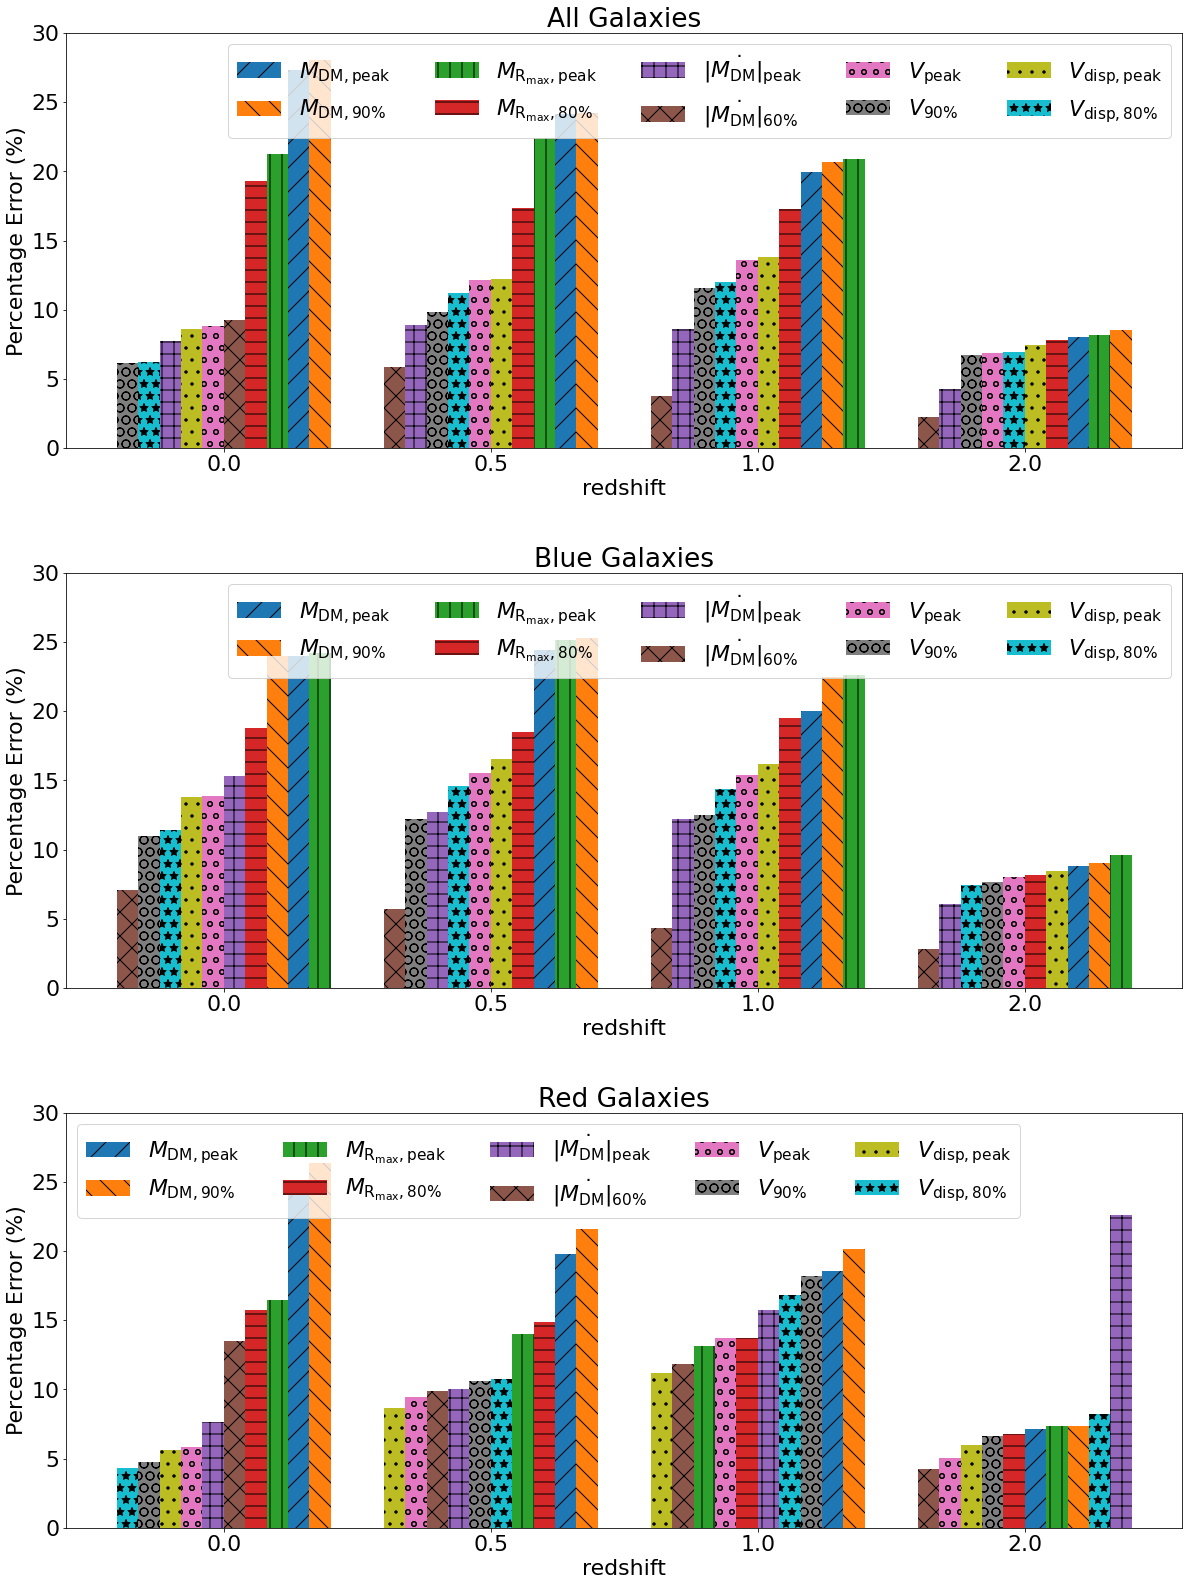

In [11]:
plot_pos = np.arange(10)
zarr = np.array([[[0.0], [0.5], [1.0], [1.5]]])
bar_pos = np.repeat(np.repeat(zarr, len(plot_pos), axis=0), 3, axis=2)
all_clust_tmp = all_clust[plot_pos]

all_z_pos = np.argsort(all_clust_tmp, axis=0)
all_z_rev = np.argsort(all_z_pos, axis=0)
bar_offs = np.linspace(-0.2, 0.2, len(plot_pos)+1)
bar_offset = (bar_offs[1:] + bar_offs[:-1])/2
bar_width = (bar_offs[1]-bar_offs[0])
bar_offsets = bar_offset[all_z_rev]
cmap = matplotlib.cm.get_cmap('tab10')
#cols = np.repeat(np.repeat(np.expand_dims(np.expand_dims(cmap(np.linspace(0.05, 0.95, len(plot_pos))), axis=1), axis=2), 4, axis=1), 4, axis=2)
cols = cmap(np.linspace(0.05, 0.95, 10))
hatch = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
#hatchs = np.repeat(np.repeat(np.expand_dims(np.expand_dims(hatch[:len(plot_pos)], axis=1), axis=2), 4, axis=1), 4, axis=2)
hatchs = hatch[:len(plot_pos)]
tits = ['All Galaxies', 'Blue Galaxies', 'Red Galaxies']

fig = plt.figure(figsize=(20, 27.5))
fig.patch.set_alpha(0.0)
plt.subplots_adjust(hspace=0.3)
for i in range(3):
    ax = plt.subplot(3, 1, i+1)
    #ax.bar((bar_pos[:,:,i]+bar_offsets[:,:,i]).flatten(), all_clust_tmp[:,:,i].flatten(), width=bar_width, color=cols[:,:,i,:].reshape(-1, 4), hatch=hatchs[:,:,i].reshape(-1))
    for j, po in enumerate(plot_pos):
        ax.bar((bar_pos[j,:,i]+bar_offsets[j,:,i]).flatten(), all_clust_tmp[j,:,i].flatten(), width=bar_width, color=cols[j], hatch=hatchs[j])
    ax.legend(plot_nms[plot_pos], ncol=5)
    ax.set_ylabel('Percentage Error (%)')
    ax.set_xlabel('redshift')
    ax.set_xticks(np.squeeze(zarr))
    ax.set_xticklabels(labels=['0.0', '0.5', '1.0', '2.0'])
    ax.set_title(tits[i])
    ax.set_ylim(0, 30)
    ax.patch.set_alpha(0.0)
    
